Nitrogen Use Efficiency project

Nitrogen use efficiency (NUE) is an important tool to improve the efficiency of fertilizers.

The first step is to upload the dataset. I will be working with cereal crop vs fertilizer application data set from Our World in Data.

Source: Our World in Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

data = pd.read_csv('cereal-crop-vs-fertilizer-application.csv')

# iterating the columns
for col in data.columns:
    print(col)

#Change the name columns to Yield and Nitrogen:
data.columns.values[3] = 'Yield'
data.columns.values[4] = 'Nitrogen'

print(data)

Entity
Code
Year
Cereals | 00001717 || Yield | 005419 || tonnes per hectare
Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare
Continent
            Entity      Code  Year   Yield  Nitrogen Continent
0         Abkhazia  OWID_ABK  2015     NaN       NaN      Asia
1      Afghanistan       AFG  1961  1.1151      0.13       NaN
2      Afghanistan       AFG  1962  1.0790      0.13       NaN
3      Afghanistan       AFG  1963  0.9858      0.13       NaN
4      Afghanistan       AFG  1964  1.0828      0.13       NaN
...            ...       ...   ...     ...       ...       ...
13361     Zimbabwe       ZWE  2017  1.2033     15.85       NaN
13362     Zimbabwe       ZWE  2018  1.2543     12.22       NaN
13363     Zimbabwe       ZWE  2019  0.7480     12.22       NaN
13364     Zimbabwe       ZWE  2020  1.1486     12.22       NaN
13365     Zimbabwe       ZWE  2021  1.5452       NaN       NaN

[13366 rows x 6 columns]


Question: What is the evolution of world cereal yield from 1961 to 2022?

We want to plot the evolution of world ceral yield from 1961 to 2022.  Nitrogen use efficiency may be calculated as the amount of cereal harvest by the amount of fertilizer used.

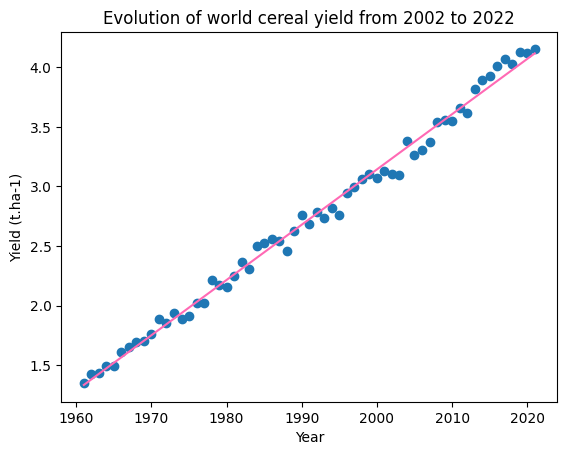

In [3]:
#Filter world data for entity
newdf = data[(data.Entity == "World")]

#Draw regression line, diferent color 
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err= stats.linregress(newdf['Year'],newdf['Yield'])

def myfunc(x):
    return slope * x + intercept
mymodel= list(map(myfunc, newdf['Year']))

plt.scatter(newdf['Year'],newdf['Yield'])
plt.plot(newdf['Year'], mymodel, color = 'hotpink')
plt.title("Evolution of world cereal yield from 2002 to 2022")
plt.xlabel("Year")
plt.ylabel("Yield (t.ha-1)")
plt.show()

Question:
How has nitrogen fertilizer use efficiency changed with increasing yields?

Nitrogen use efficiency may be computed as the amount of cereals produced by unit of fertilizer used

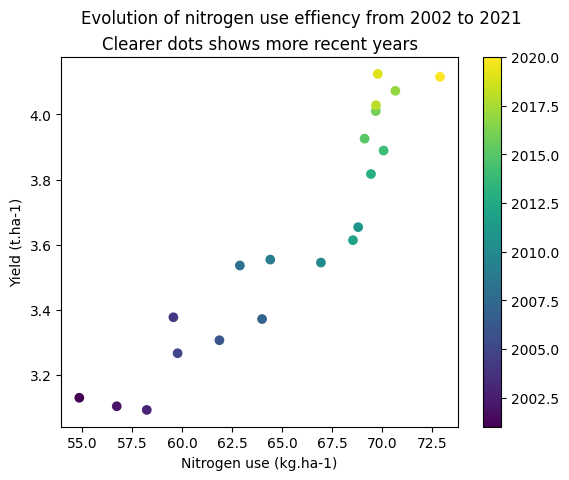

In [4]:
# Start plotting Nitrogen use vs yield as colormap

#Filter world data for entity
newdf1 = newdf[(newdf.Year >= 2001)&(newdf.Year < 2021)]

#Scatter plot
plt.scatter(newdf1['Nitrogen'],newdf1['Yield'], c =newdf1['Year'])
plt.suptitle ('Evolution of nitrogen use effiency from 2002 to 2021')
plt.title("Clearer dots shows more recent years")
plt.xlabel("Nitrogen use (kg.ha-1)")
plt.ylabel("Yield (t.ha-1)")
plt.colorbar()
plt.show()

In [10]:
import numpy as np

#Create a new column to measure the efficiency
newdf1['Efficiency'] = newdf1['Yield']/newdf1['Nitrogen']

#Define conditions for Efficiency values
conditions = [
    (newdf1['Efficiency']== newdf1.iloc[0]['Efficiency']),
    (newdf1['Efficiency'] < newdf1.iloc[0]['Efficiency']),
    (newdf1['Efficiency'] > newdf1.iloc[0]['Efficiency']),
]

#define results
results= ['Stable','Decrease','Increase']

#Create new column based on conditions
newdf1['Eff_relative'] = np.select(conditions, results)

#plot the above information
import plotly.express as px

fig = px.scatter(newdf1, x='Nitrogen', y='Yield', text ='Year', color='Eff_relative',
                  labels= { "Nitrogen": "Nitrogen use (kg.ha-1)", "Yield": "Yield (t.ha-1)"})
fig.update_traces (textposition = 'top center')
fig.update_layout (title_text= 'Evolution of nitrogen use efficiency from 2002 to 2021')
fig.show()



Can we wonder what are the differences in efficiency between countries?

There is a high variability of nitrogen use efficency between countries. Each dot represents one year from 2001 to 2021. 

In [11]:
#plot box of Australia, Brazil, China, France, India, United States
import plotly.express as px
#Filter world data for entity
df= data[(data.Year >= 2001) & (data.Year < 2021)]
df = df.dropna(subset=['Nitrogen', 'Yield'])
df_top5 = df.loc[df['Entity'].isin(['Australia', 'Brazil', 'China', 'France', 'India', 'United States'])]

#Create a new column to measure the efficiency
df_top5['Efficiency'] = df_top5['Yield']/df_top5['Nitrogen']

#Create the boxplot
fig = px.box(df_top5, x='Entity', y='Efficiency', points ='all', labels= { "Entity": "Country", "Efficiency": "NUE (t of cereals per kg N)"})
fig.update_layout (title_text= 'Comparison of nitrogen use efficiency (NUE)')
fig.show()

Another form of visualization of the efficiency in Australia, Brazil, China, France, India and USA in the last 20 years.



In [12]:
#Another visualization of efficiency in the Australia, Brazil, china, France, India and USA
import plotly.express as px

fig= px.line(df_top5, x= "Year", y="Efficiency", color='Entity')
fig.update_layout (title_text= 'Comparison of nitrogen use efficiency (NUE)')
fig.show()